# Centroid Neural Network with Plots

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs

In [2]:
def remove_element(L,arr):
    ind = 0
    size = len(L)
    while ind != size and not np.array_equal(L[ind],arr):
        ind += 1
    if ind != size:
        L.pop(ind)
    else:
        raise ValueError('array not found in list.')
        
def plot_cnn_result(input_data, centroids, cluster_indices, figure_size=(8,8)):

    X = input_data
    num_clusters = len(centroids)

    plt.figure(figsize=figure_size)

    cnn_cluster_elements = []

    for i in range(num_clusters):
        display = []
        for x_th in range(len(X)):
            if cluster_indices[x_th] == i:
                display.append(X[x_th])

        cnn_cluster_elements.append(display)

        display = np.array(display)
        plt.scatter(display[:,0], display[:,1])
        plt.scatter(centroids[i][0], centroids[i][1], s=200, c='red')
        plt.text(centroids[i][0], centroids[i][1], f"Cluster {i}", fontsize=14)        

    plt.show()

# Test with Higher Num of Clusters (k=10)

In [3]:
def return_cnn_result_plot(input_data, centroids, cluster_indices, epoch_th, figure_size=(8,8)):

    X = input_data
    num_clusters = len(centroids)

    figure = plt.figure(figsize=figure_size)

    cnn_cluster_elements = []

    for i in range(num_clusters):
        display = []
        for x_th in range(len(X)):
            if cluster_indices[x_th] == i:
                display.append(X[x_th])

        cnn_cluster_elements.append(display)

        display = np.array(display)
        plt.scatter(display[:,0], display[:,1])
        plt.scatter(centroids[i][0], centroids[i][1], s=200, c='red')
        plt.text(centroids[i][0], centroids[i][1], f"Cluster {i}", fontsize=14)       
        plt.title(f"Epoch {epoch_th}")
    
    return figure

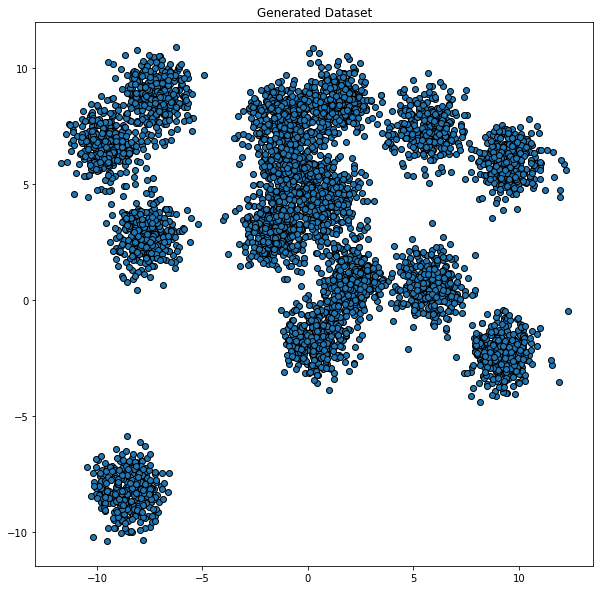

In [4]:
# Generate Dataset
X, y = make_blobs(n_samples=5000, centers=15, cluster_std=0.8, random_state=0)
plt.figure(figsize=(10, 10))
plt.scatter(X[:,0], X[:,1],edgecolor="k")
plt.title("Generated Dataset")
plt.show()

In [5]:
# Centroid Neural Networks
centroid_X = np.average(X[:, -len(X[0]):], axis=0)
epsilon = 0.05

w1 = centroid_X + epsilon
w2 = centroid_X - epsilon

print(w1)
print(w2)

w = []
w.append(w1)
w.append(w2)

[-0.06139509  3.37728913]
[-0.16139509  3.27728913]


In [6]:
########## EPOCH 0 ##########
initial_clusters = 2

# Create an array to store elements in each cluster
cluster_elements = []     
for cluster in range(initial_clusters):
    cluster_i = []
    cluster_elements.append(cluster_i)

cluster_lengths = np.zeros(initial_clusters, dtype=int)

# Create an array to label for each element
cluster_indices = []

for i in range(len(X)):
    x = X[i]

    distances = []
    for w_i in w:
        dist = np.linalg.norm(x-w_i)
        distances.append(dist)

    # find winner neuron
    index = np.argmin(distances)

    # add cluster index of data x to a list
    cluster_indices.append(index)

    # update winner neuron
    w[index] = w[index] + 1/(1+cluster_lengths[index])*(x - w[index])

    # append data to cluster
    cluster_elements[index].append(x)

    cluster_lengths[index] += 1

centroids = []
for elements in cluster_elements:
    elements = np.array(elements)
    centroid_i = np.average(elements[:, -len(elements[0]):], axis=0)
    centroids.append(centroid_i)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21


C:\Users\st\AppData\Local\Temp\ipykernel_8688\2997461102.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  figure = plt.figure(figsize=figure_size)


22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
Reach the Desired Number of Clusters. Stop at Epoch  89


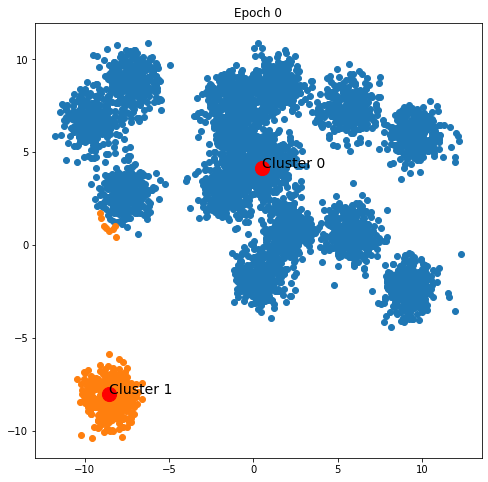

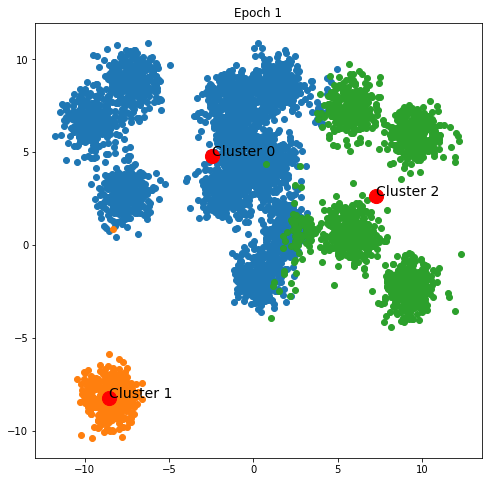

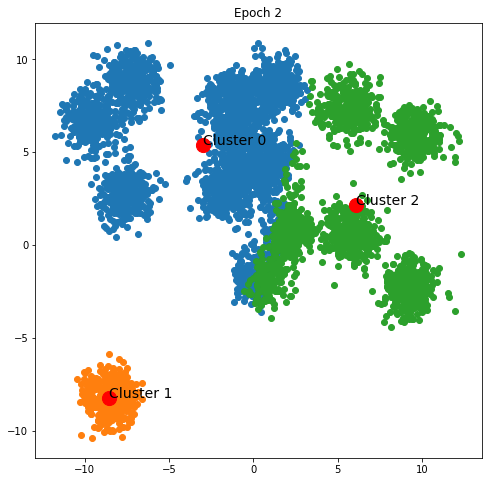

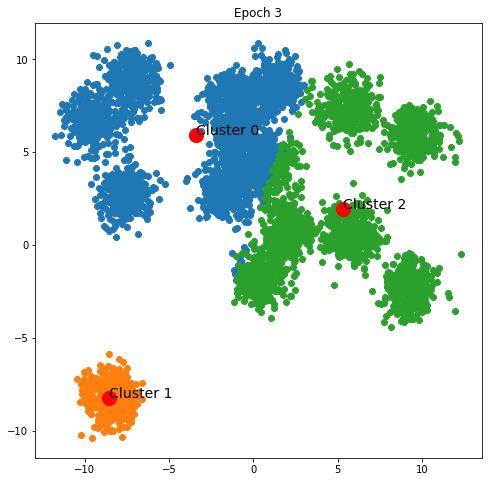

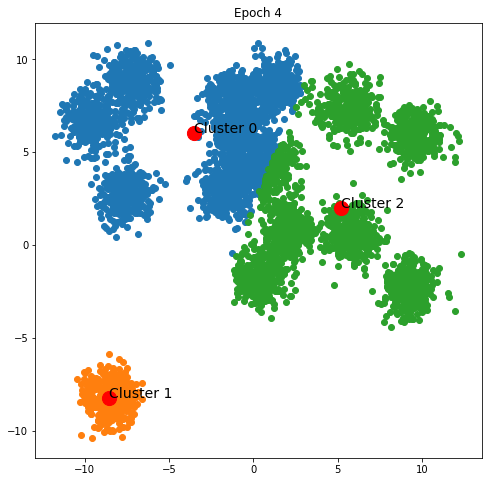

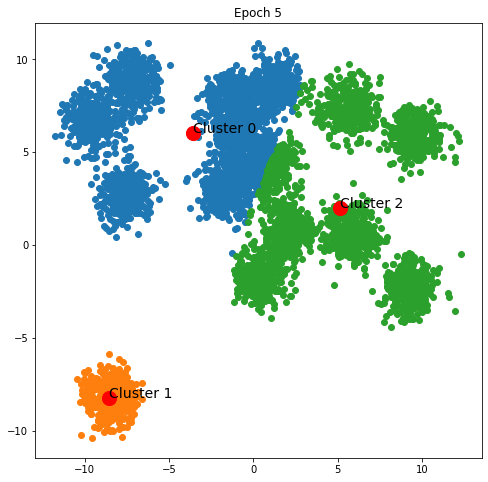

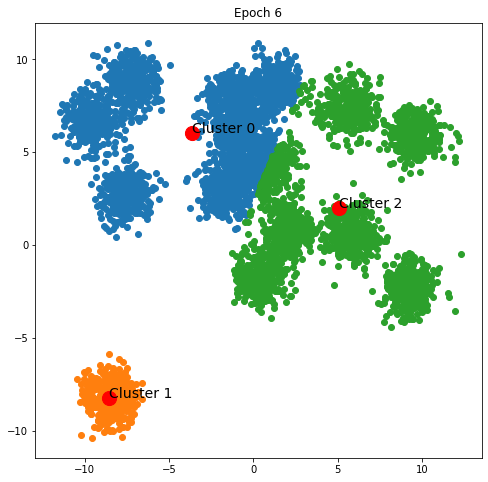

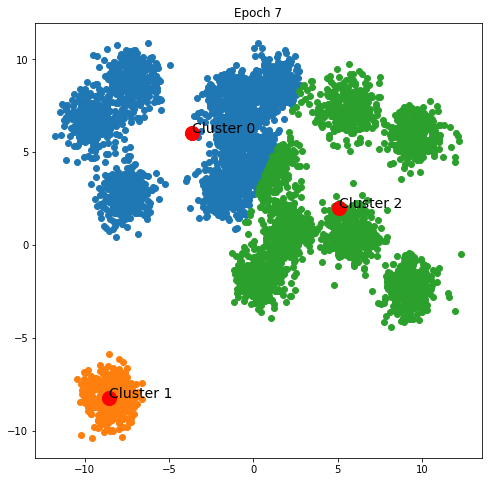

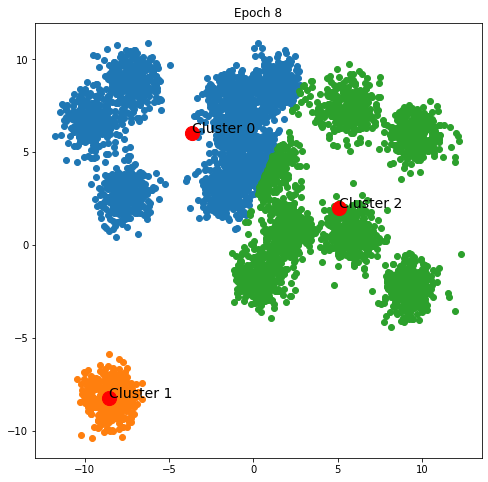

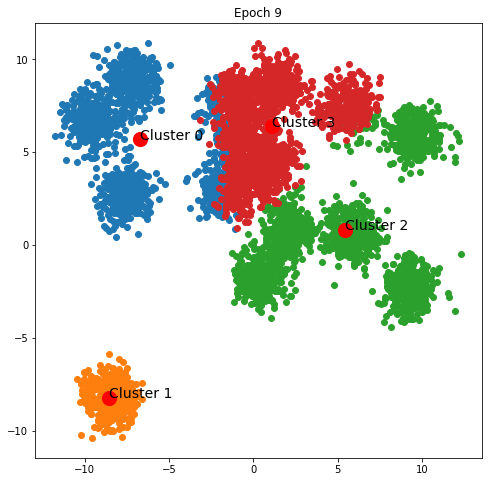

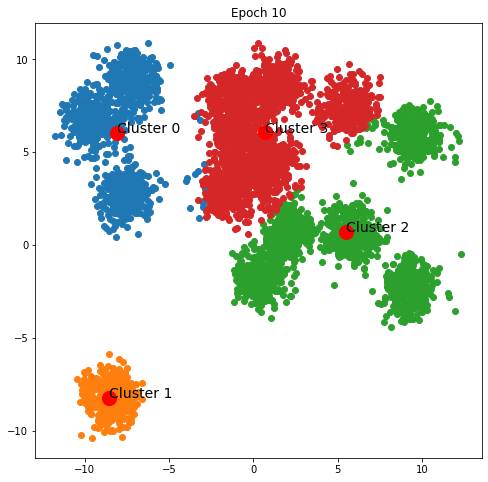

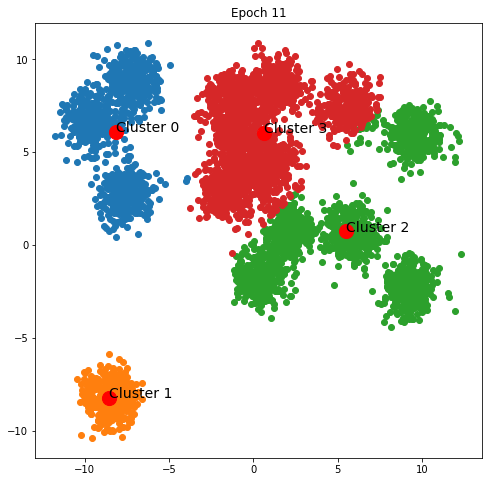

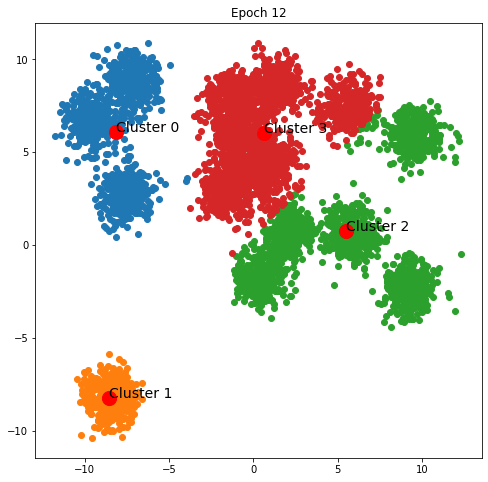

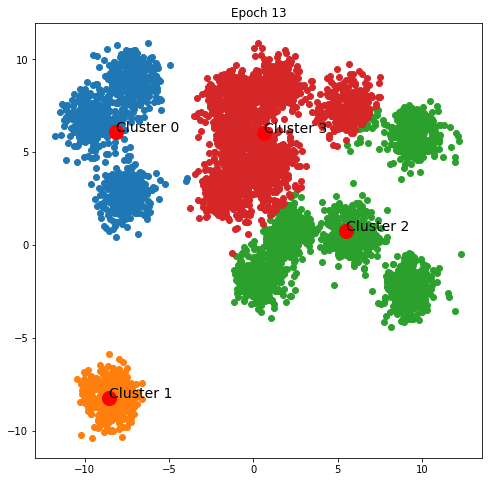

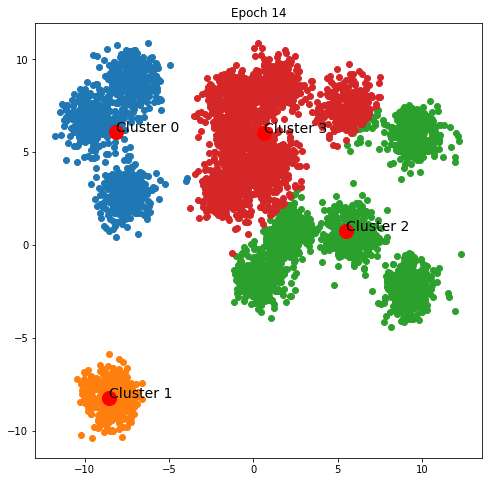

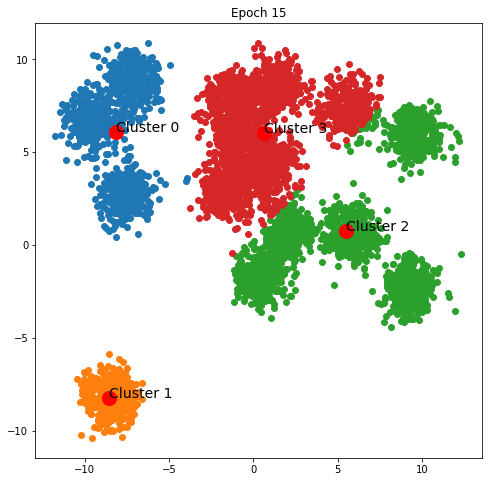

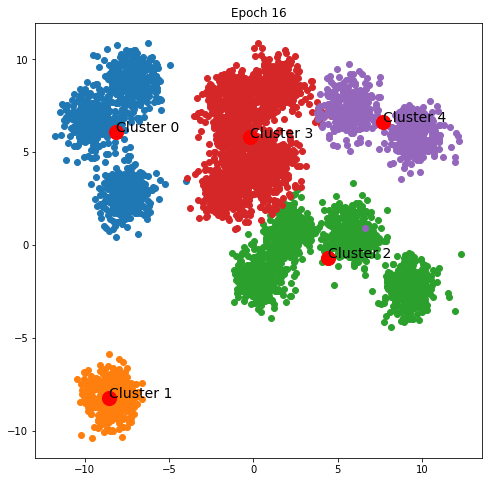

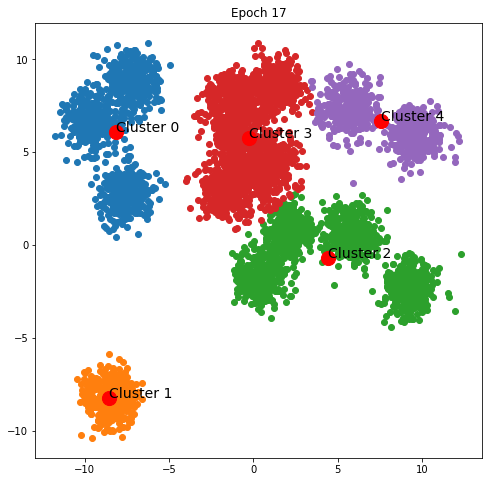

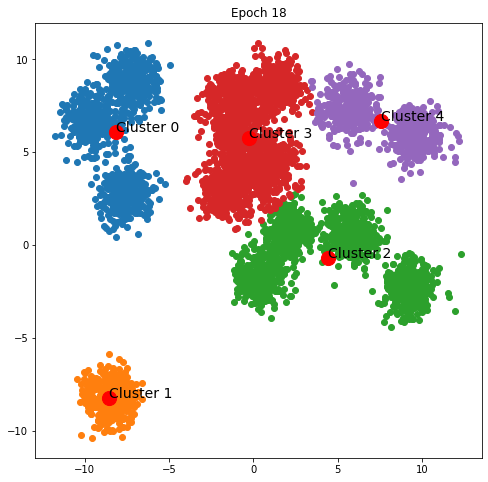

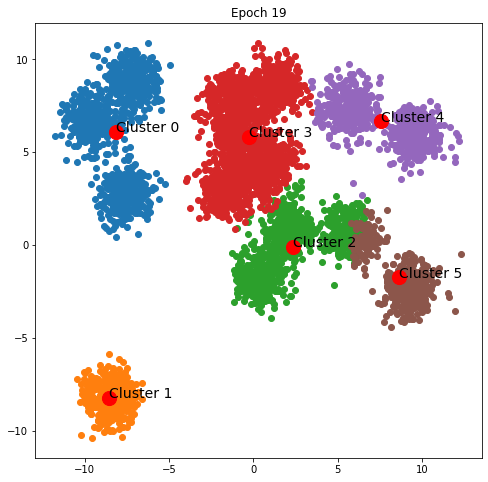

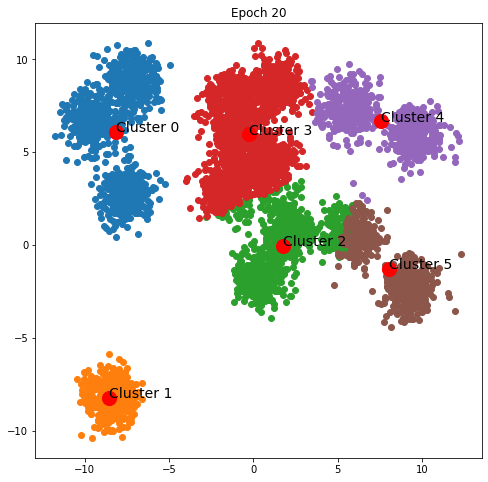

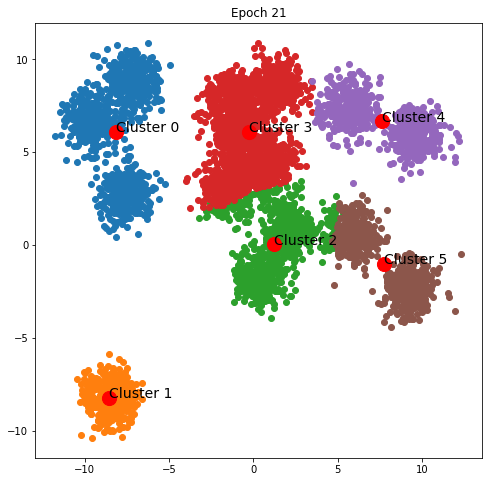

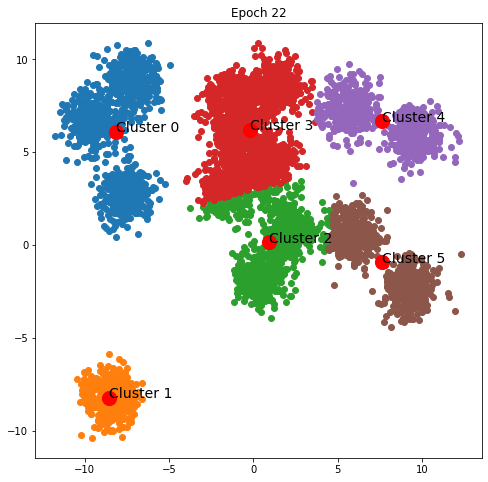

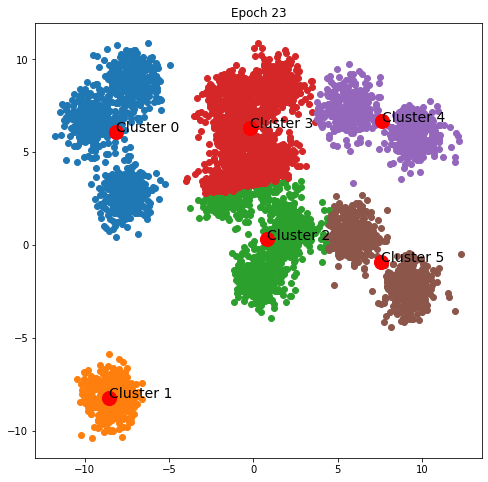

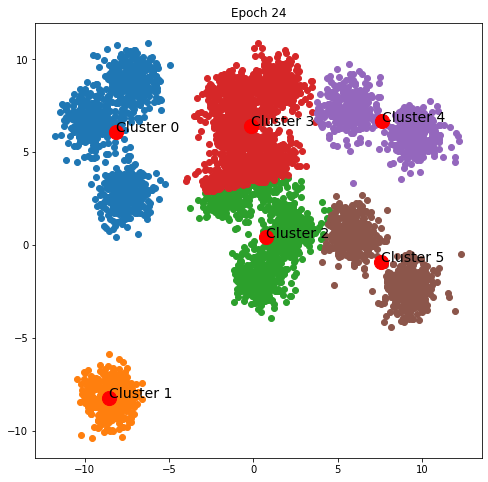

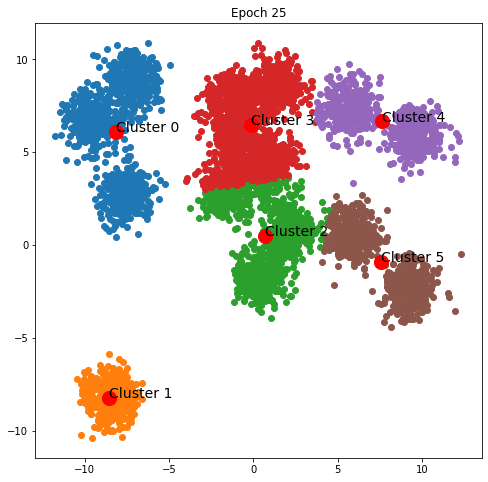

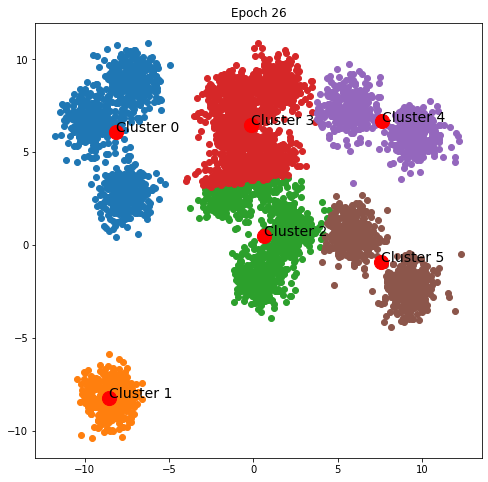

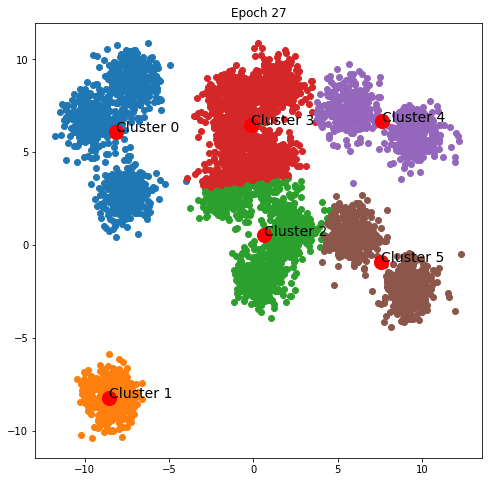

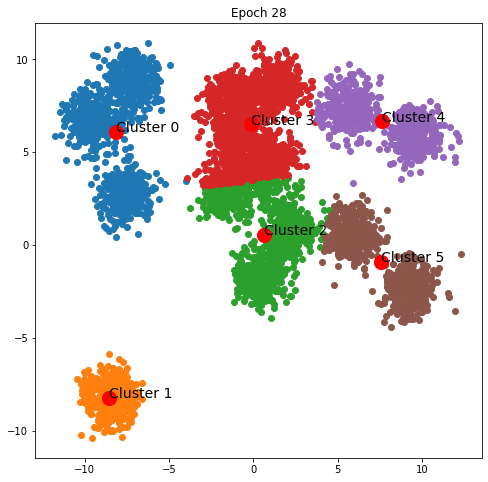

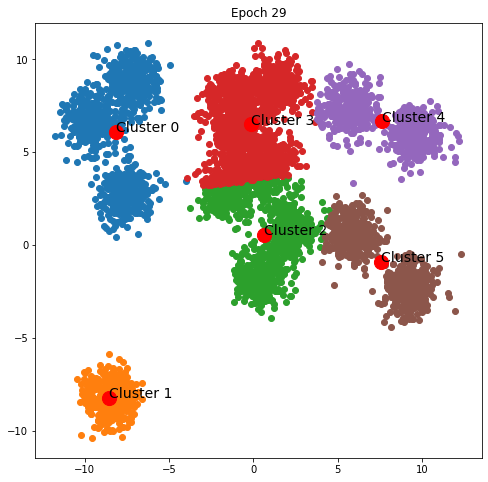

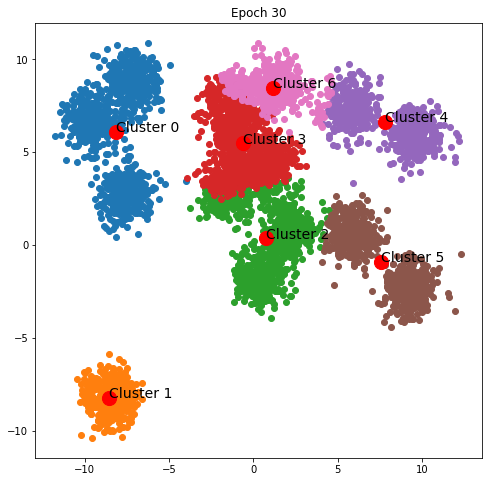

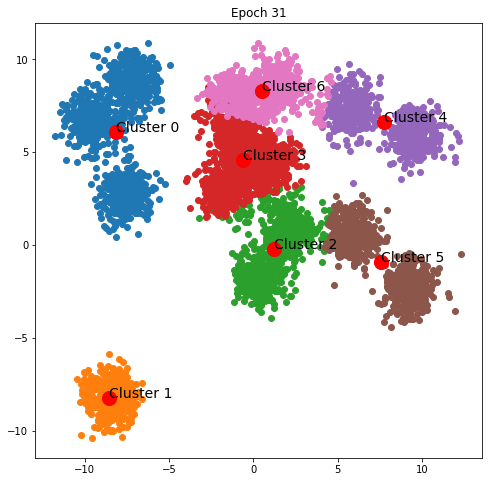

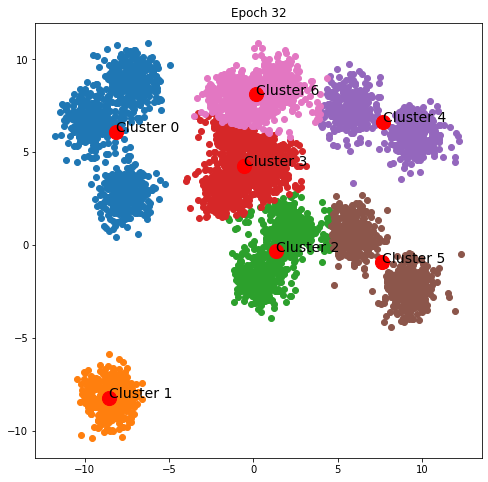

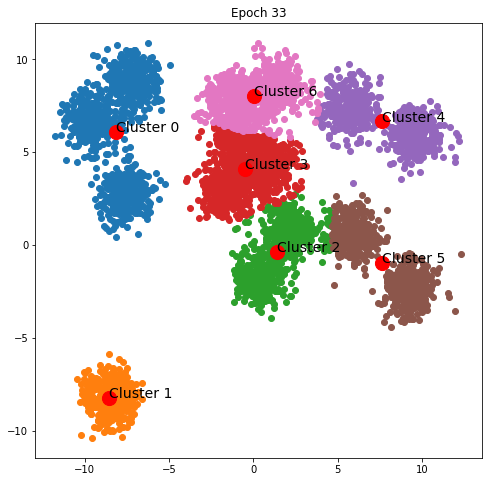

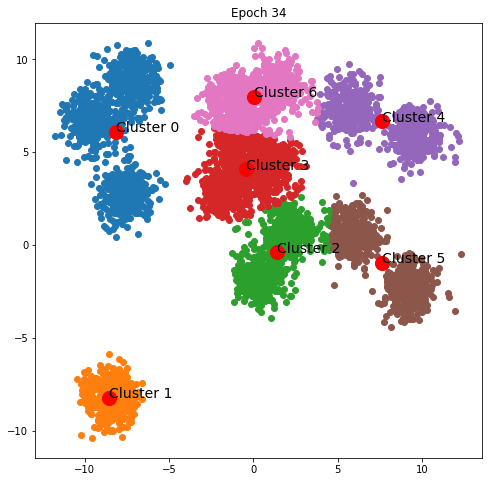

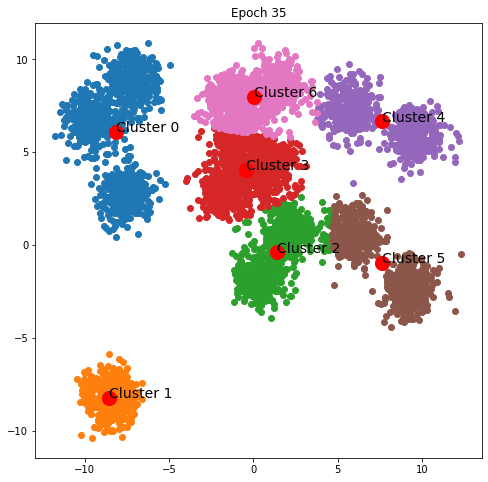

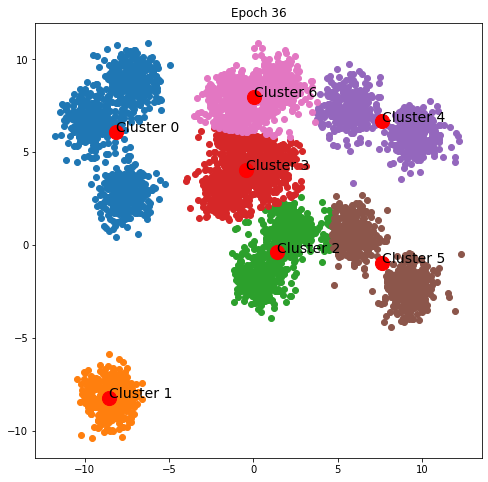

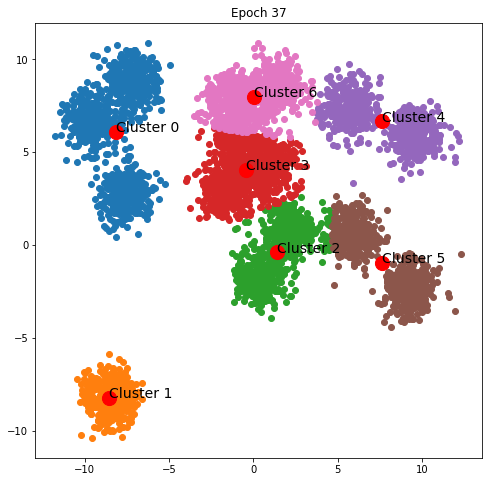

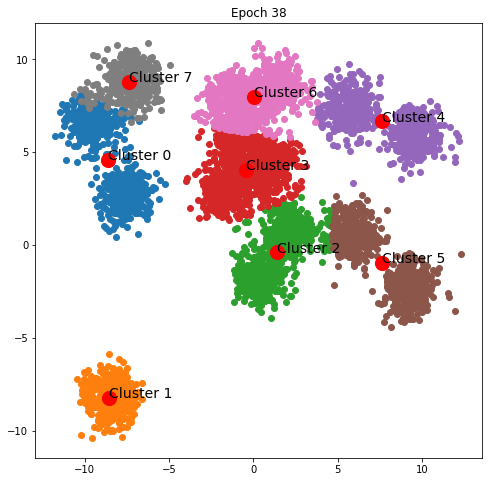

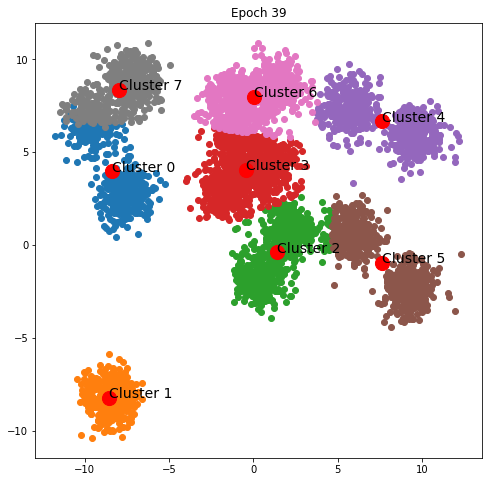

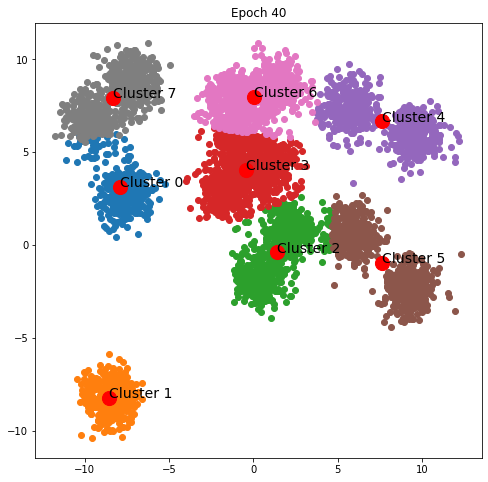

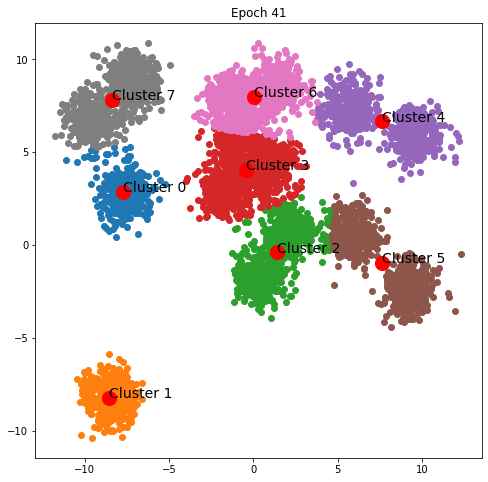

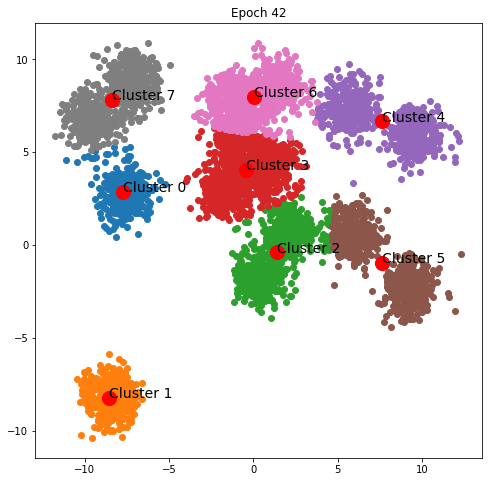

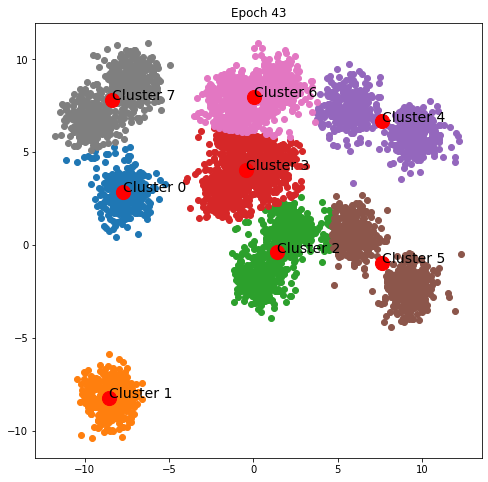

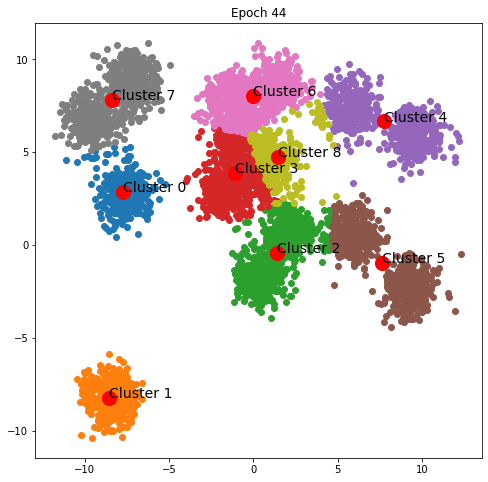

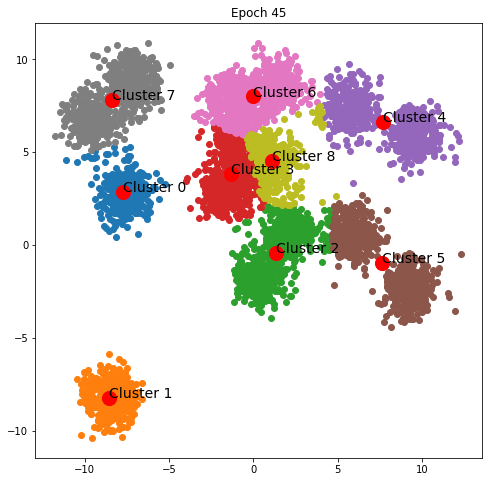

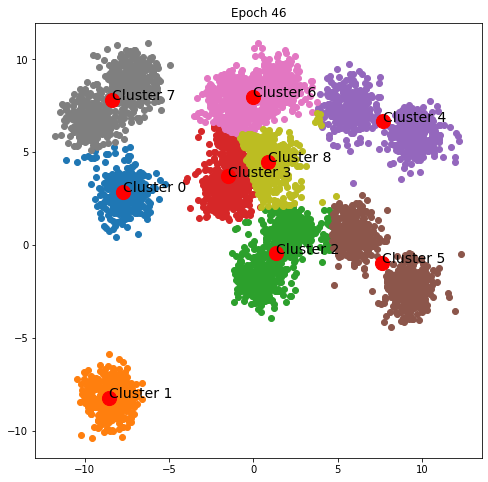

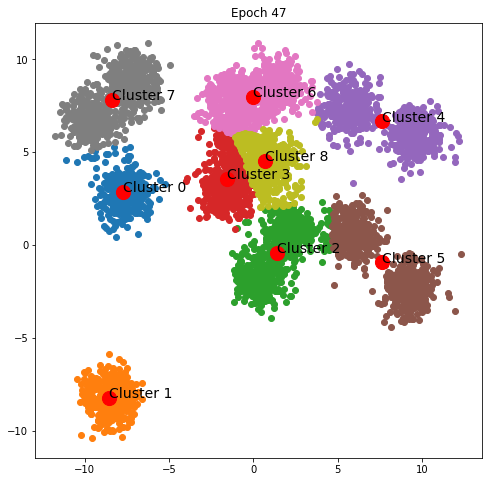

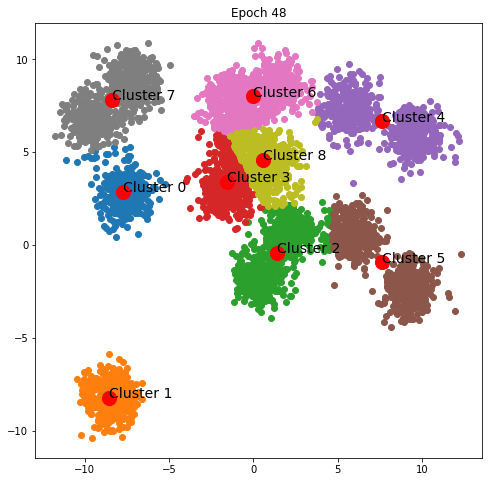

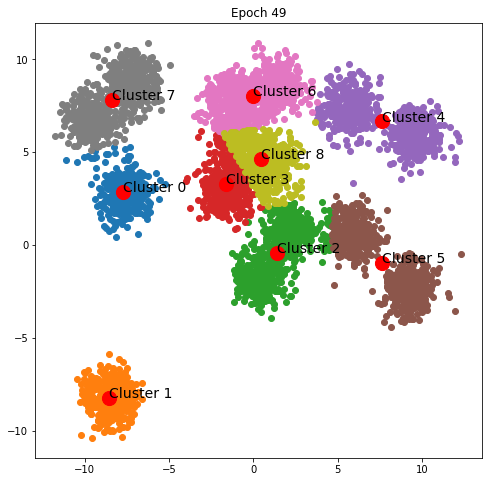

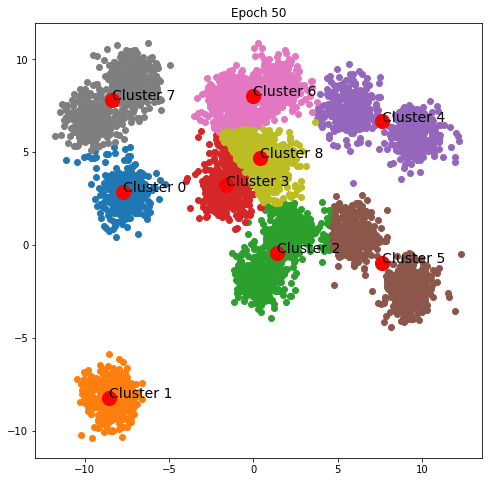

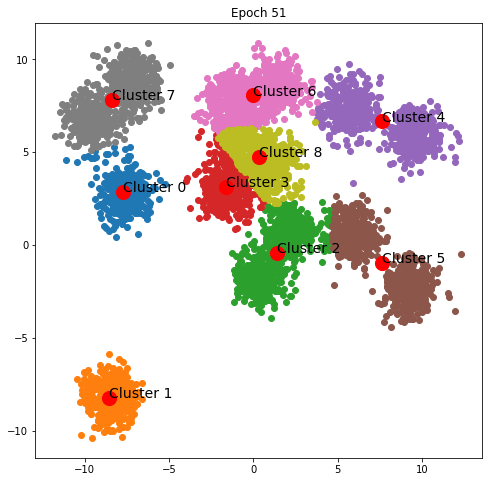

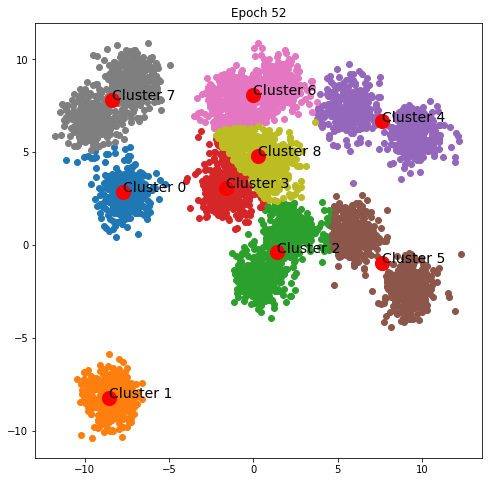

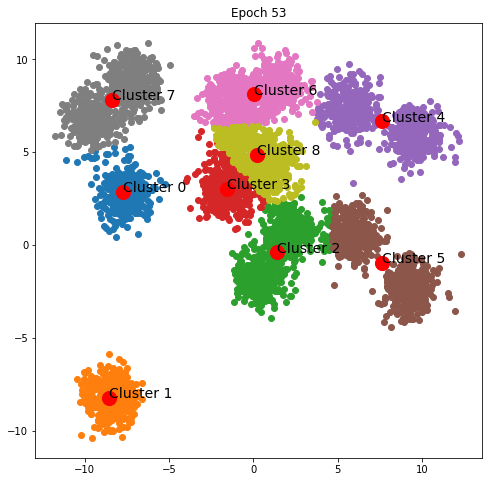

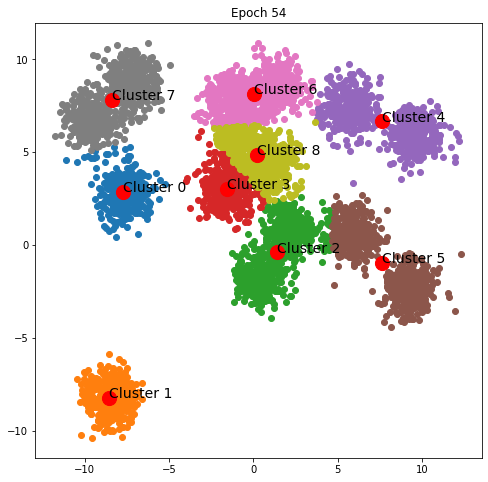

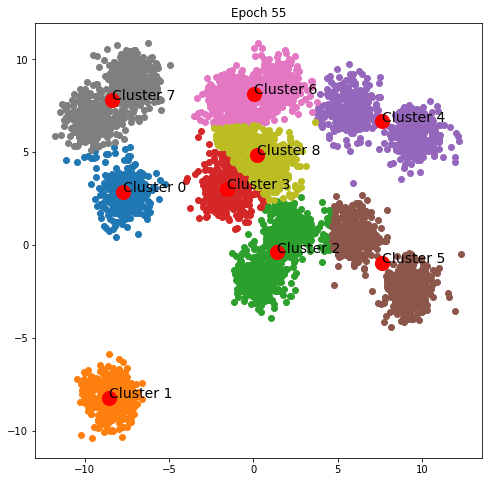

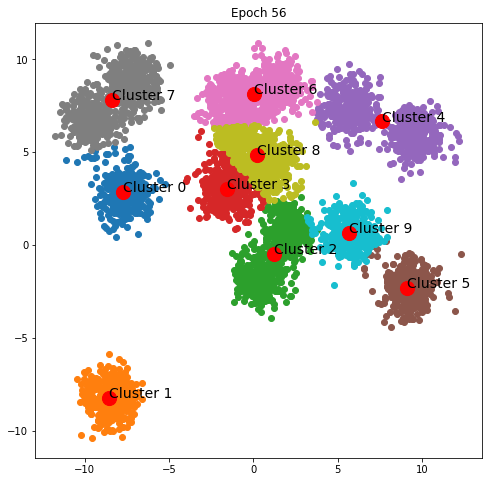

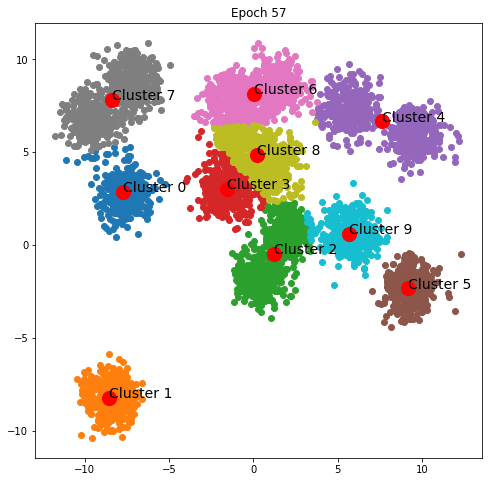

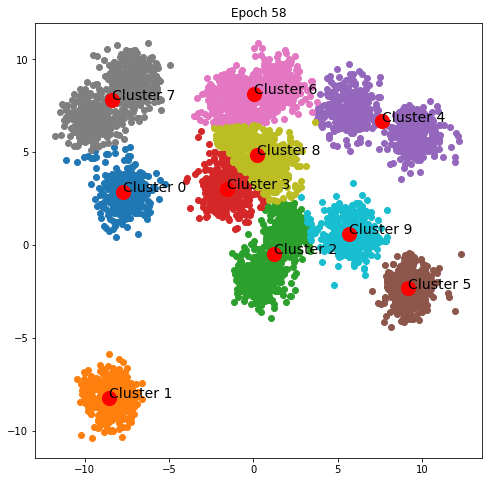

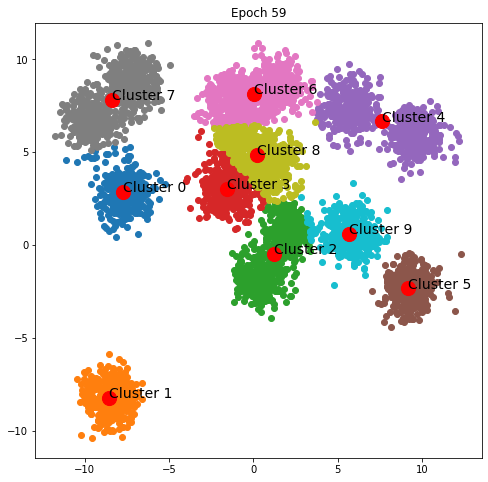

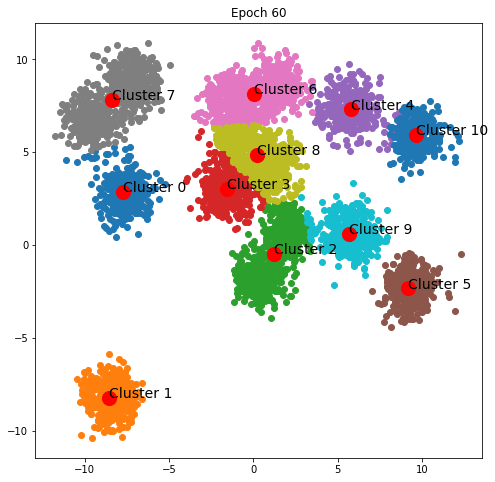

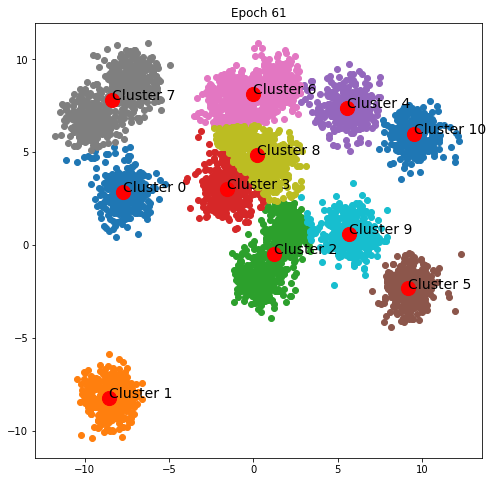

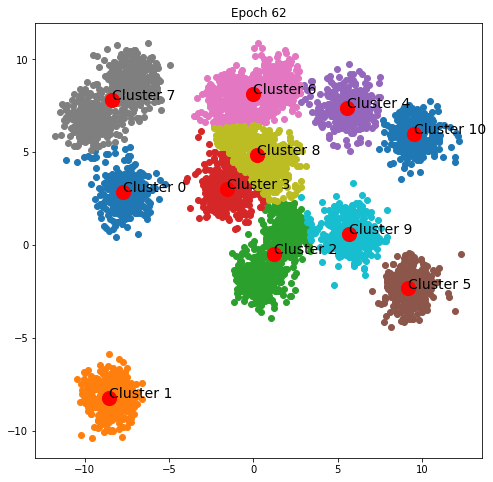

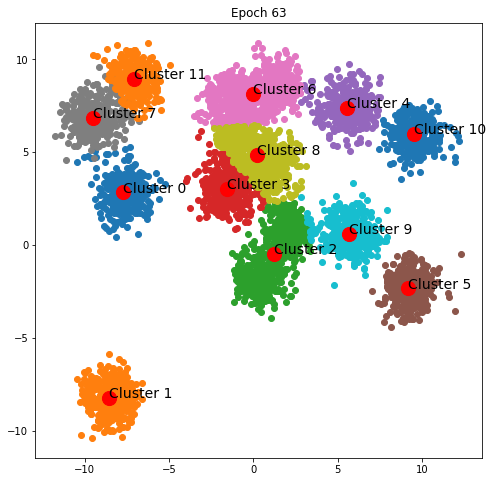

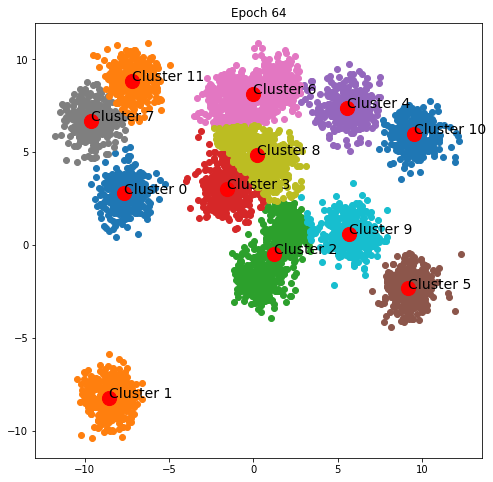

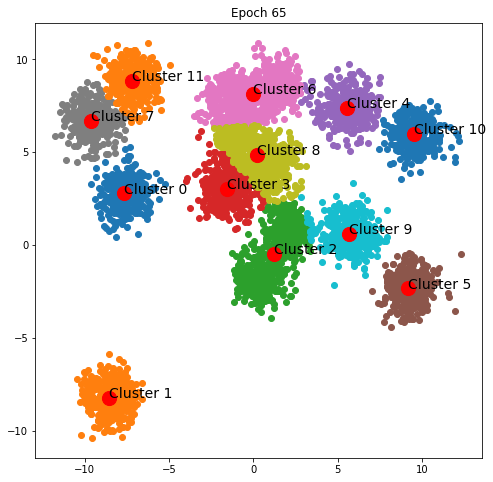

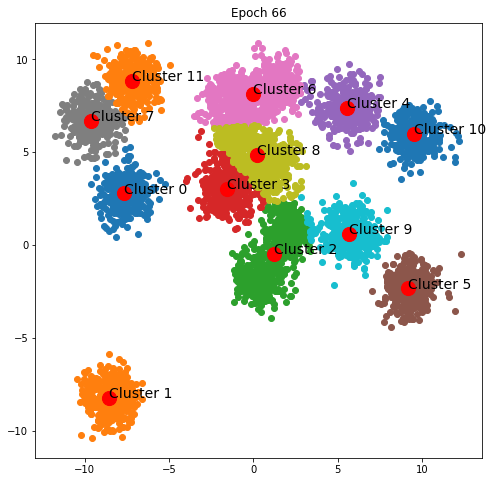

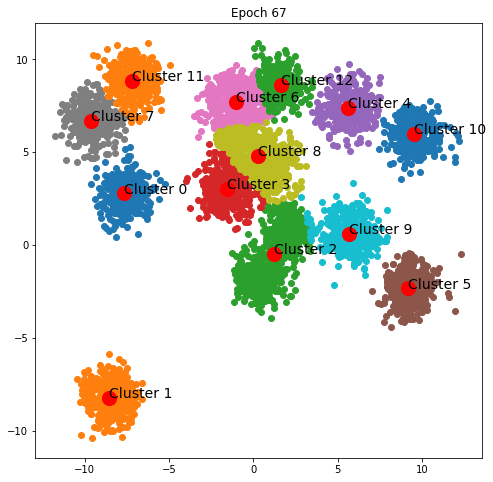

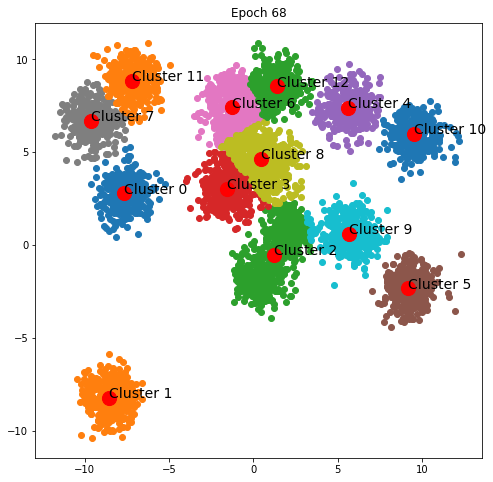

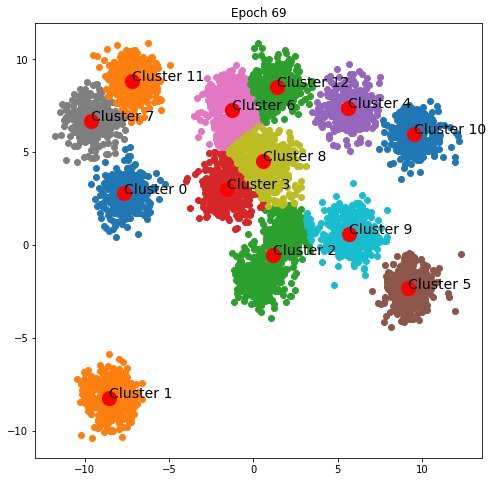

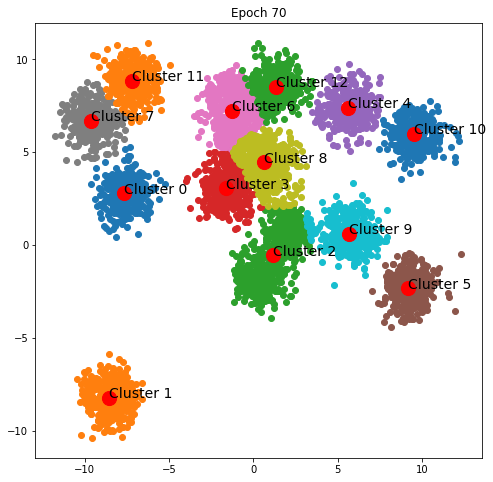

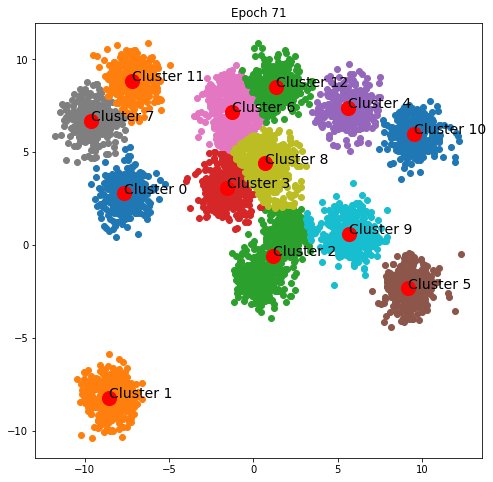

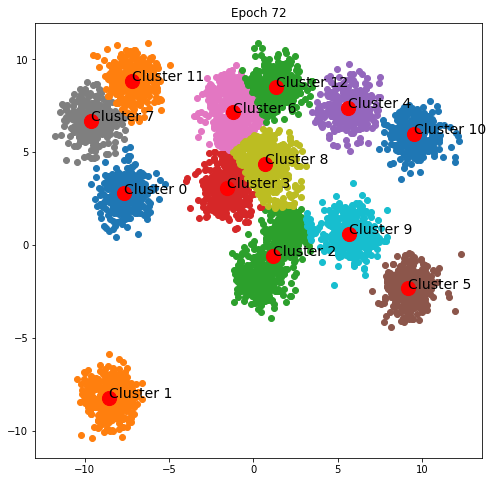

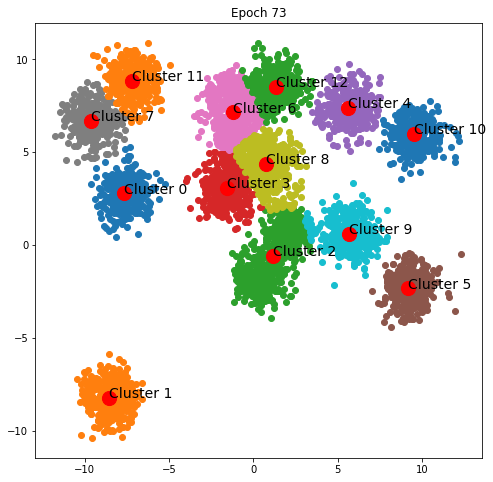

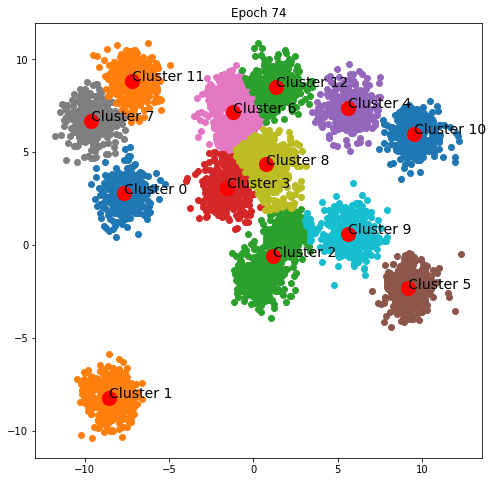

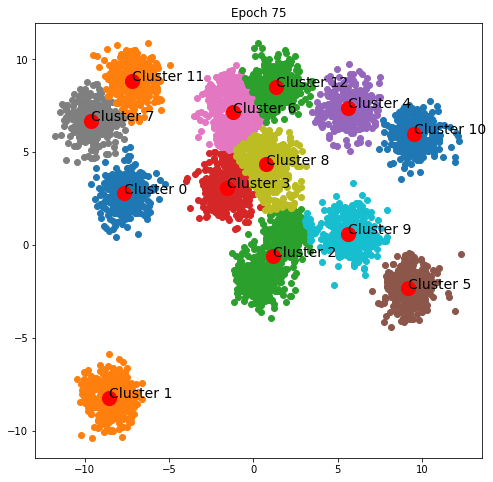

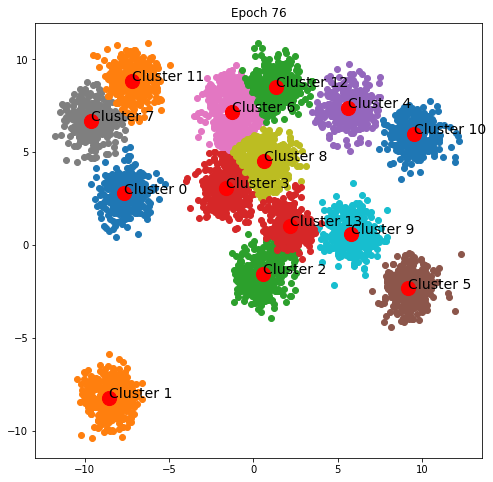

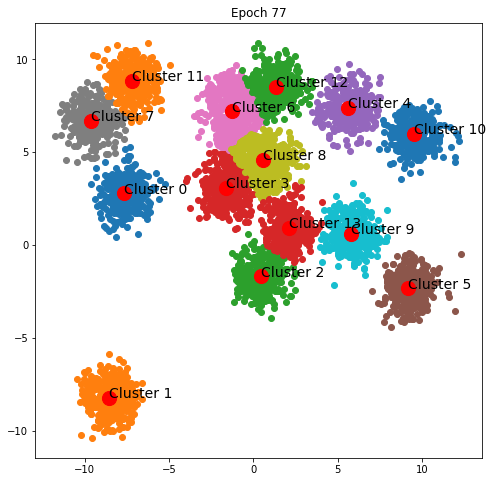

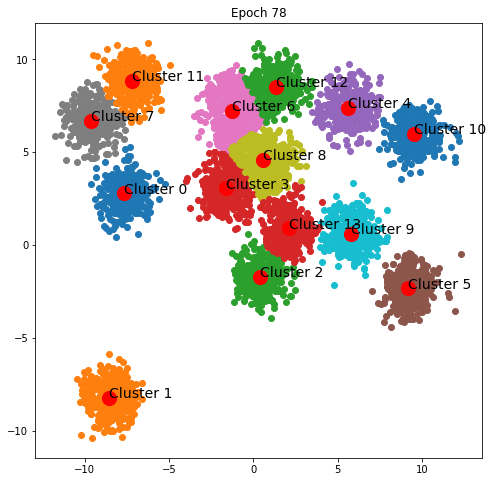

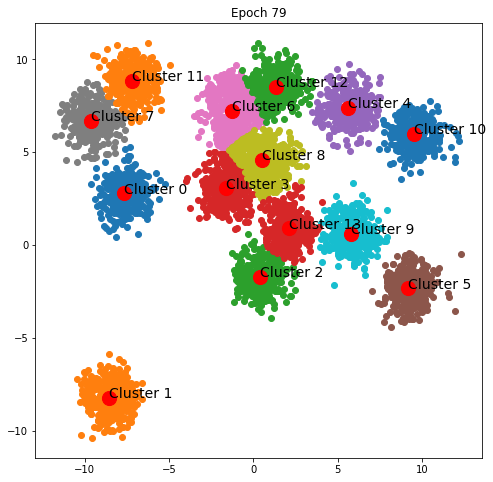

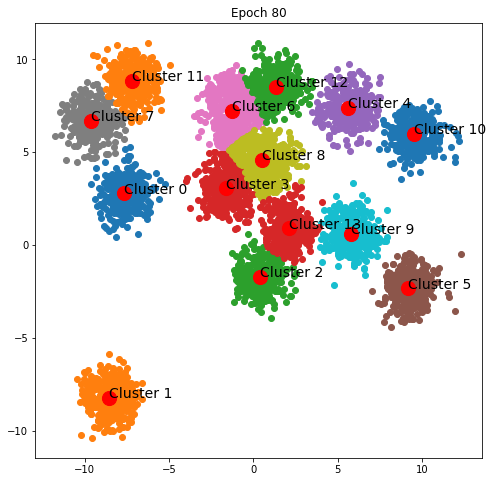

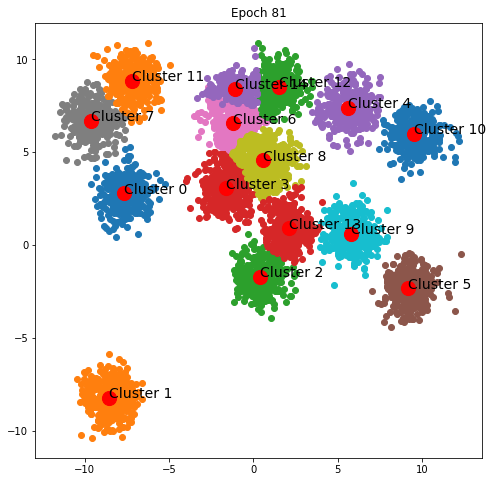

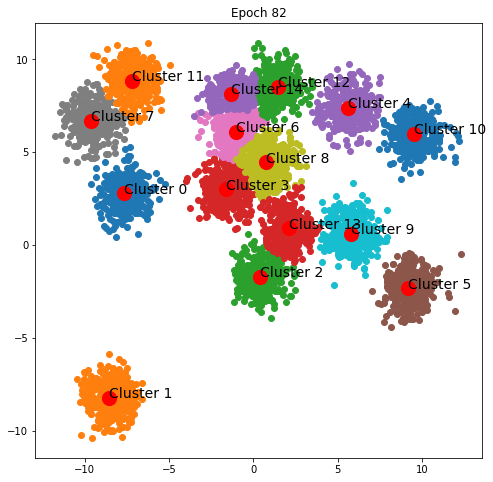

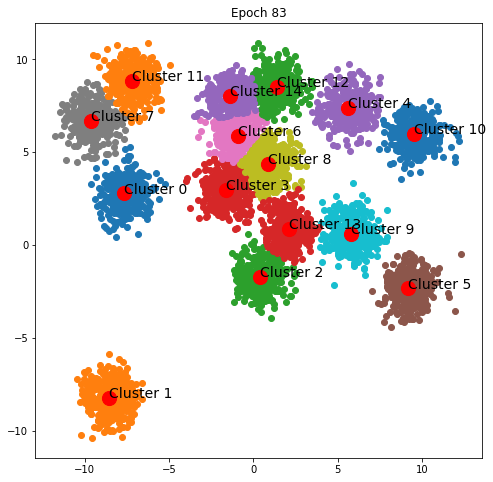

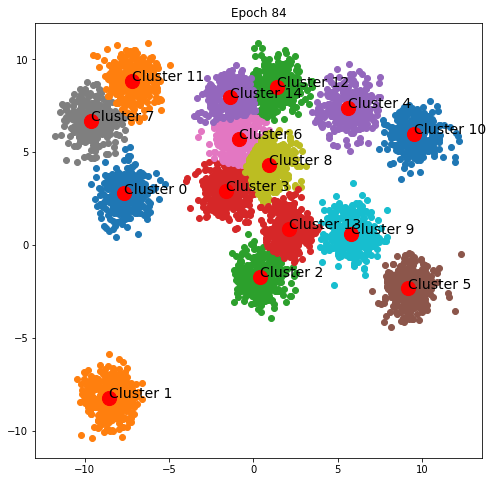

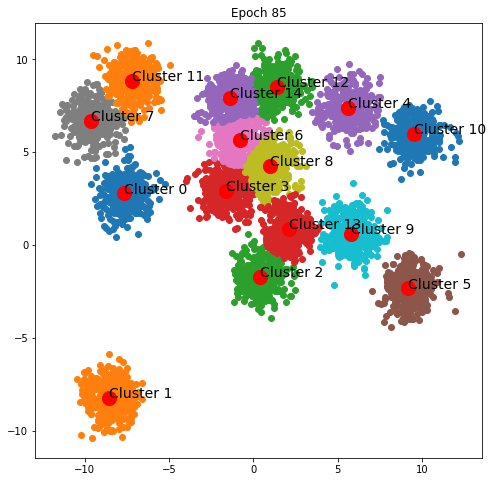

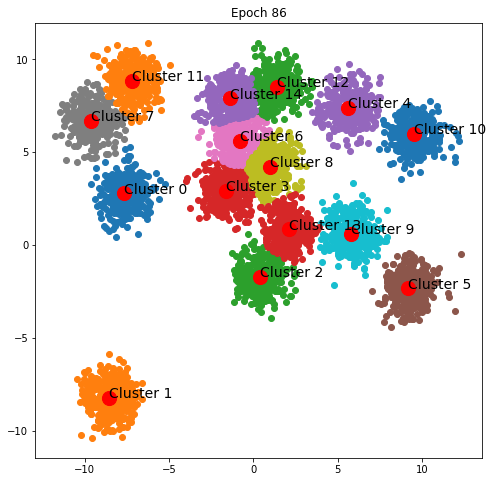

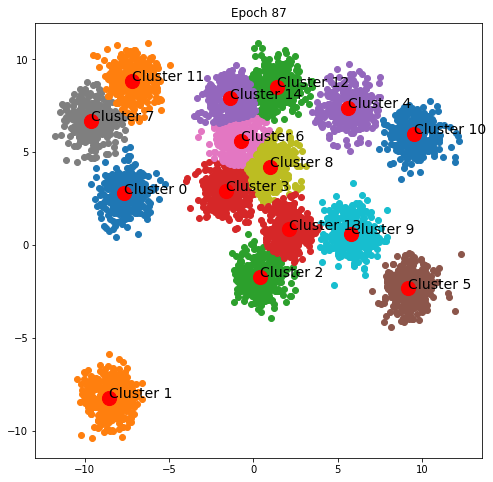

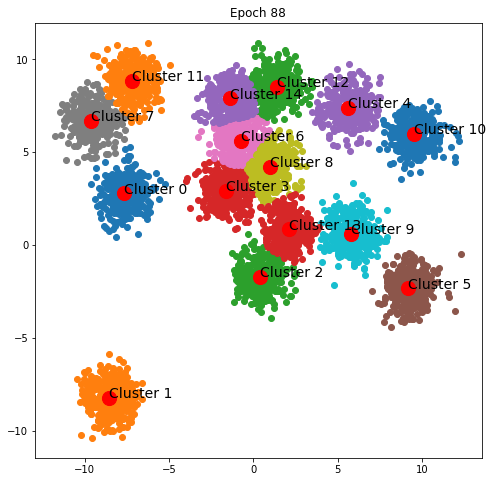

In [7]:
n_clusters = 15
max_iteration = 200

########## EPOCH 1+ - INCREASE NUM OF CLUSERS ##########
num_of_all_clusters = n_clusters
epochs = max_iteration

for epoch in range(epochs):
    loser = 0

    for i in range(len(X)):
        x = X[i]

        distances = []
        for w_i in w:
            dist = np.linalg.norm(x-w_i)
            distances.append(dist)

        # find winner neuron of x
        current_cluster_index = np.argmin(distances)

        # what was the winner for x in previous epoch
        x_th = i
        previous_cluster_index = cluster_indices[x_th]

        # check if current neuron is a loser
        if previous_cluster_index != current_cluster_index:
            # update winner neuron
            w[current_cluster_index] = w[current_cluster_index] + (x - w[current_cluster_index])/(cluster_lengths[current_cluster_index]+1)

            # update loser neuron
            w[previous_cluster_index] = w[previous_cluster_index] - (x - w[previous_cluster_index])/(cluster_lengths[previous_cluster_index]-1)

            # add and remove data to cluster    
            cluster_elements[current_cluster_index] = list(cluster_elements[current_cluster_index])
            cluster_elements[current_cluster_index].append(x)
            remove_element(cluster_elements[previous_cluster_index], x)  

            # update cluster index
            cluster_indices[x_th] = current_cluster_index

            cluster_lengths[current_cluster_index] += 1
            cluster_lengths[previous_cluster_index] -= 1

            loser += 1

    centroids = []
    for elements in cluster_elements:
        elements = np.array(elements)
        centroid_i = np.average(elements[:, -len(elements[0]):], axis=0)
        centroids.append(centroid_i)
        
    print(epoch+1)
    
    # plot_cnn_result(X, centroids, cluster_indices, figure_size=(8,8))
    fig = return_cnn_result_plot(X, centroids, cluster_indices, epoch, figure_size=(8,8))
    
    plt.savefig(f'./images/{epoch}.png')
    
    if loser == 0: 
        if len(w) == num_of_all_clusters:
            print("Reach the Desired Number of Clusters. Stop at Epoch ", epoch+1)
            break

        else:
            all_error = []
            for i in range(len(centroids)):

                # calculate error
                error = 0
                for x in cluster_elements[i]:
                    # error += np.sqrt((x[0] - w[i][0])**2 + (x[1] - w[i][1])**2)
                    
                    dist_e = np.linalg.norm(x-centroids[i])
                    error += dist_e

                all_error.append(error)

            splitted_index = np.argmax(all_error)

            new_w = w[splitted_index] + epsilon
            w.append(new_w)

            new_cluster_thing = []
            new_cluster_thing = np.array(new_cluster_thing)

            cluster_elements.append(new_cluster_thing)

            cluster_lengths = list(cluster_lengths)
            cluster_lengths.append(0)
            cluster_lengths = np.array(cluster_lengths)

# Make GIF

In [8]:
from PIL import Image
import glob

In [9]:
# Create the frames
frames = []
imgs = glob.glob("./images/*.png")

# For GIF
for i in range(len(imgs)):
    new_frame = Image.open(f"./images/{i}.png")
    frames.append(new_frame)
    
# Delay at the end
for i in range(18):
    new_frame = Image.open(f"./images/81.png")
    frames.append(new_frame)

# Display Final Result

In [10]:
for centroid in centroids:
    print(centroid)

[-7.66643584  2.77477786]
[-8.55762982 -8.24052867]
[ 0.41913985 -1.70868074]
[-1.60100044  2.92441915]
[5.61573698 7.36832789]
[ 9.18262882 -2.33872655]
[-0.75674782  5.60524003]
[-9.62560235  6.66482092]
[1.00939214 4.19568532]
[5.79741681 0.59442881]
[9.54022892 5.97266178]
[-7.18989403  8.84832103]
[1.39265455 8.52467354]
[2.09117322 0.84801752]
[-1.36707077  7.89263972]
